Reads and plots figures from `perv_patterns_dir`

In [1]:
import imageio
import os
import numpy as np
import matplotlib.pylab as plt
from skimage import color
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import RegularGridInterpolator

In [2]:
perv_patterns_dir = "/Users/octavia/Dropbox/SVE_v2/images/pervious_patterns"


In [3]:
image_files = os.listdir(perv_patterns_dir)
filepath= '/'.join([perv_patterns_dir, image_files[2]])

In [4]:
#  three parameters: threshold, trim and scale, which you can change 
trim = 10
threshold = 0.5

params= {'ncol' : 50, 'nrow' :  100}

image = imageio.imread(filepath)
grey_image = color.rgb2gray(image[trim:-trim, trim:-trim])
grey_image = np.fliplr(grey_image.T)

image = 1.0*(grey_image > float(threshold)) # binarize
scale = image.shape[1]/params['nrow'] 

y = np.arange(0, image.shape[0])
x = np.arange(0, image.shape[1])
interpolating_function = RegularGridInterpolator((y, x), image)

xv = np.arange(0, image.shape[0], scale)
yv = np.arange(0, image.shape[1], scale)

xv, yv = np.meshgrid(xv,yv)
image2 = interpolating_function((xv, yv)).T   


ncol, nrow = params['ncol'], params['nrow']
isveg = np.zeros([ncol+1, nrow+1])
nx = min(ncol, image2.shape[0])
ny = min(nrow, image2.shape[1])

isveg[:nx, :ny] = image2[:nx, :ny]


Text(0.5, 1.0, 'Regridded')

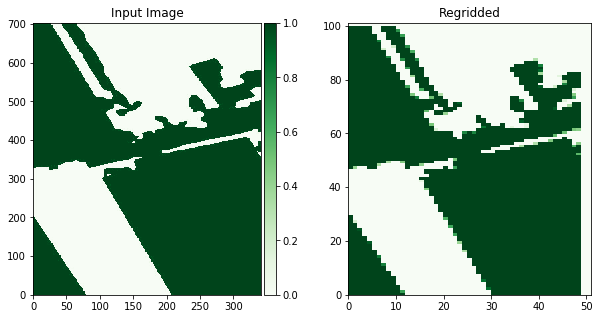

In [5]:

fig= plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace = 0.3)

ax = fig.add_subplot(121)                       
im = ax.pcolormesh(grey_image.T, cmap = 'Greens')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)    
ax.set_title('Input Image')

ax = fig.add_subplot(122)
im = ax.pcolormesh(isveg.T, cmap = 'Greens')
divider = make_axes_locatable(ax)
 
ax.set_title('Regridded')

# print 'scaled image shape=' , image2.shape
# print 'input  veg shape=' ,  isveg.shape


In [6]:
def wrap_image_veg(path, params):
    
    from skimage import io, color
    import imageio
    from scipy.interpolate import RegularGridInterpolator    
    
    #filepath = path.replace(params['batch_name'], params['image_dir']).replace('/input', '')
    filepath = dirname(dirname(path))

    filepath = '/'.join([filepath,  params['image_dir'], params['im']])

    #  three parameters: threshold, trim and scale, which you can change 
    trim = 1
    threshold = 0.5
        
    image = imageio.imread(filepath)
    image = color.rgb2gray(image[trim:-trim, trim:-trim])
    image = np.fliplr(image.T)

    image = 1.0*(image > float(threshold)) # binarize
    scale = image.shape[1]/1.0/params['nrow'] # might be better to get scale from Ly

    y = np.arange(0, image.shape[0])
    x = np.arange(0, image.shape[1])
    interpolating_function = RegularGridInterpolator((y, x), image)

    xv = np.arange(0, image.shape[0], scale)
    yv = np.arange(0, image.shape[1], scale)

    xv, yv = np.meshgrid(xv,yv)
    image2 = interpolating_function((xv, yv)).T   
    image2 = 1.0*(image2 > float(threshold)) # binarize

    #ncol, nrow = image2.shape
    ncol, nrow = params['ncol'], params['nrow']
    isveg = np.zeros([ncol+1, nrow+1])

    nx = min(ncol, image2.shape[0])
    ny = min(nrow, image2.shape[1])

    isveg[:nx, :ny] = image2[:nx, :ny]

    write_veg(path + '/input', ncol, nrow, isveg )
    get_points(path+  '/input', isveg, nrow, ncol) 
    
    return isveg